<a href="https://colab.research.google.com/github/carlosarturoceron/dataKids/blob/main/ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introducción

En esta libreta de Python, exploraremos el conjunto de datos MNIST, un conjunto de datos clásico para el aprendizaje automático y la visión por computadora. Visualizaremos las imágenes del conjunto de datos, las transformaremos en píxeles y entrenaremos una red neuronal para clasificar los dígitos escritos a mano.

### Importación de librerías

Comenzaremos importando las librerías necesarias para trabajar con el conjunto de datos MNIST y entrenar la red neuronal:

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Carga del conjunto de datos MNIST

El conjunto de datos MNIST está disponible en TensorFlow. Podemos cargarlo utilizando la siguiente función:

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


La variable `x_train` contiene las imágenes de entrenamiento, mientras que `y_train` contiene las etiquetas correspondientes (los dígitos escritos a mano). `x_test` y `y_test` contienen las imágenes y etiquetas de prueba, respectivamente.

### Visualización de imágenes

Para tener una idea del conjunto de datos, podemos visualizar algunas imágenes:

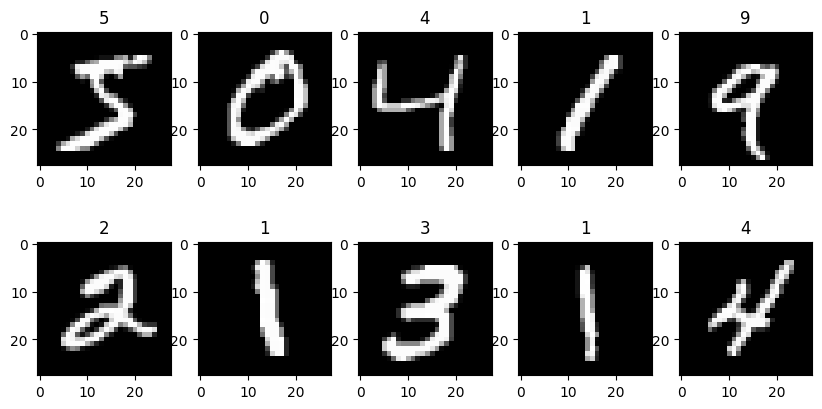

In [3]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
plt.show()

Este código muestra 10 imágenes aleatorias del conjunto de datos de entrenamiento, junto con sus dígitos correspondientes.

### Transformación de imágenes en píxeles

Las redes neuronales funcionan mejor con datos numéricos. Por lo tanto, convertiremos las imágenes en matrices de píxeles:

In [4]:
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255

Este código transforma las imágenes en matrices tridimensionales, donde cada matriz representa una imagen con 28 filas y 28 columnas (píxeles). La escala de los valores de los píxeles se normaliza entre 0 y 1.

### Definición de la red neuronal

Ahora definiremos la arquitectura de la red neuronal:

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Esta red neuronal convolucional consta de dos capas convolucionales, dos capas de max pooling, una capa de aplanamiento y dos capas densas. La capa de salida utiliza la función de activación softmax para clasificar las imágenes en 10 clases (los dígitos del 0 al 9).

### Compilación y entrenamiento de la red neuronal

Compilaremos la red neuronal utilizando un optimizador, una función de pérdida y una métrica de evaluación:

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 3ms/step - loss: 0.1285 - accuracy: 0.9615
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0436 - accuracy: 0.9870
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0284 - accuracy: 0.9911
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0217 - accuracy: 0.9934
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0160 - accuracy: 0.9948


Este código entrena la red neuronal durante 5 épocas (pasadas) en el conjunto de datos de entrenamiento.

### Evaluación de la red neuronal

Finalmente, evaluaremos la precisión de la red neuronal en el conjunto de datos de prueba:

In [28]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Precisión:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0292 - accuracy: 0.9915
Precisión: 0.9915000200271606


In [37]:
model.predict(x_test[0].reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 134ms/step


array([[1.3652878e-08, 1.0824500e-09, 7.4210266e-06, 6.2510680e-06, 2.9111100e-09, 1.8323345e-08, 2.5867568e-16, 9.9998510e-01, 4.1806302e-08, 1.1450711e-06]], dtype=float32)

Este código muestra la precisión de la red neuronal en el conjunto de datos de prueba.

### Resumen

En esta libreta, hemos explorado el conjunto de datos MNIST, visualizado las imágenes y las transformado en píxeles, y entrenado una red neuronal para clasificar los dígitos escritos a mano. La red neuronal alcanza una precisión